# Fundamentals of Computer Vision: Applied Projects


This Jupyter notebook contains the bases of the projects you need to develop during the semester.

The main goal of this project is twofold: 1st is to reiterate the theoretical context of the lectures and 2nd to use those methods in adapted examples for real-world scenarios.

---

## Import libraries, util functions and test image loading



In [4]:
import cv2
import urllib3
import numpy as np
from typing import List, Tuple  # for type hinting

from PIL import Image

from matplotlib import pyplot as plt


# Block 3. Segmentation as region classifiers

## List of segmentation algorithms by type

### Threshold-Based Segmentation (Mandatory. Implement by hand / Extend from previous labs)
- **Global Thresholding**: Applies a single threshold value across the entire image to separate objects from the background.
- **Adaptive Mean Thresholding**: Computes thresholds for different regions of the image based on mean values to handle varying lighting conditions.
- **Otsu's Thresholding**: Calculates an optimal threshold value that minimizes intra-class variance, or equivalently, maximizes inter-class variance.

### Edge-Based Segmentation (Mandatory. Implement by hand / Extend from previous labs)
- **Sobel Operator**: Detects edges using a pair of 3x3 convolution kernels, one for horizontal changes, and one for vertical.
- **Canny Edge Detector**: A multi-stage algorithm that includes noise reduction, gradient calculation, non-maximum suppression, and edge tracking by hysteresis.
- **Laplacian of Gaussian (LoG)**: Applies a Gaussian blur to smooth the image before computing the Laplacian for edge detection, capturing blobs and edges.

### Watershed-Based Segmentation (Mandatory. Use OpenCV implementation)
- **Watershed Algorithm**: Treats the gradient magnitude of an image as a topographic surface and finds watershed lines to segment the image based on catchment basins.

### Region-Based Segmentation (Choose 1. Implement by hand. Can make use of scikit-image library)
- **Split-and-Merge**: This technique recursively splits an image into regions based on a homogeneity criterion and then merges adjacent regions that have similar properties.
- **Flood Fill**: Also known as seed fill, this method starts from a seed point and grows a region by adding neighboring pixels that are similar to the seed.
Represents an image as a graph, where nodes correspond to segments and edges represent adjacency between segments, then merges nodes based on similarity measures.

### Clustering-Based Segmentation (Only analysis)
- **K-means Clustering**: Partitions the image into clusters based on pixel color or intensity, with the number of clusters predefined.
- **Gaussian Mixture Models (GMM)**: Uses a probabilistic model to represent normally distributed subpopulations within the overall population, providing a soft-segmentation of the image.


### List of ideas for improving some methods results
---

### Threshold-Based Segmentation

Global Thresholding:
1. Implement histogram analysis to automatically select a better global threshold.
2. Experiment with different global thresholds and evaluate the results using entropy-based or region-based metrics.

Adaptive Mean Thresholding:
1. Explore the use of different shapes and sizes for the local neighborhood when computing the mean value.
2. Combine with a preprocessing step that performs histogram equalization to enhance contrast before thresholding.

Otsu's Thresholding:
1. Extend Otsu's method to work with multi-level thresholds instead of just bi-level thresholds.


### Edge-Based Segmentation

Canny Edge Detector:
1. Optimize the selection of low and high threshold values using the median of the gradient magnitudes.
2. Implement an automated hysteresis process that adapts to the edge strength histogram of the image.

Laplacian of Gaussian (LoG):
1. Experiment with scale-space representation by varying the standard deviation of the Gaussian filter.
2. Automate the selection of the Gaussian kernel size based on the analysis of the image frequencies.

### Watershed-Based Segmentation

Watershed Algorithm:
1. Implement pre-processing steps to reduce noise, such as morphological operations, before applying the watershed.
2. Use marker-based watershed segmentation, where markers are determined automatically through morphological operations or distance transformation.

### Region-Based Segmentation

Split-and-Merge (RAG):
1. Incorporate texture or color gradients as additional criteria for deciding splits or merges, enhancing the segmentation for complex scenes.

Flood Fill:
1. Develop an adaptive flood fill algorithm where the tolerance level for pixel similarity is determined based on local image statistics.
2. Integrate edge detection results to guide the flood fill process, preventing it from crossing likely boundaries.


## Mandatory Questions

#### Threshold-Based Segmentation
1. Explain the basic concept of global thresholding. How is a single threshold value determined and applied across the entire image?
2. In what scenarios is adaptive mean thresholding more effective than global thresholding?
3. Describe Otsu's thresholding method in detail. How does it compute an optimal threshold value, and what makes it different from simple global thresholding?

#### Edge-Based Segmentation
4. Describe how the Sobel operator works. What are the roles of its horizontal and vertical kernels?
5. Explain the steps involved in the Canny Edge Detector algorithm.
6. What is the Laplacian of Gaussian? How does it differ from applying a Laplacian filter directly?

#### Watershed-Based Segmentation
7. Describe the watershed algorithm. How does it use the concept of topography to segment images?

#### Region-Based Segmentation*
8. Explain the process of region growing. How does the algorithm determine which pixels to include in a region?
9. Describe mean-shift segmentation. What are its main advantages and limitations?
10. What is the split-and-merge approach to image segmentation? How does it differ from region growing?
11. Explain the flood fill algorithm. In what situations is it most effective?

#### Clustering-Based Segmentation
12. How does K-means clustering segment an image? What are the limitations of this method?
13. Explain both Gaussian Mixture Models and K-means in the context of image segmentation. Which are the similarities and difference between the methods?


*Answer only the ones related to your selection

### Optional Questions

1. Compare and contrast the output of edge-based and region-based segmentation techniques. In what situations would you prefer one over the other? Explain why and provide examples on each method perform better than the other.
2. How does the choice of parameters (like kernel size or threshold values) affect the outcome of different segmentation algorithms? Since it can affect differently depending on the algorithm, explain how affects on each of them.
3. Analyze the computational complexity of the different segmentation methods. Which methods are more suitable for real-time applications? Provide "big O" notation and an estimation of the execution time for the methods.
4. Discuss the challenges of segmenting images with low contrast. What methods can be particularly effective in these scenarios?
5. Investigate the impact of image resolution on the performance of various segmentation algorithms. Are they sensitive or not?
6. Explore the use of segmentation in object tracking (segment and recognize the same object in a video). Which methods are most effective and why?
7. Discuss the limitations of traditional segmentation techniques in handling complex images and suggest potential improvements.
8. Evaluate the effectiveness of combining multiple segmentation techniques. Can hybrid approaches yield better results? Propose some hybrid methods. Are ensemble methods enough for improving results?
9. Analyze the role of color spaces in image segmentation. How does the choice of color space affect segmentation performance?


Since `Optional questions` ask about several topics I suggest to tackle them into a separete section in the report (Discussion / Comparision / Analysis) instead of including fragrments of the answer across each type of the method

## 1. Threshold-based Segmentation Exercise
**Objective:**  
Implement basic global thresholding method.
Then the adaptive version. Later implement Otsu's thresholding algorithm to find automatically the best value. Finally implement the local versions of those algorithms.

**Guideline:**
1. Load a grayscale image.
2. Apply basic global thresholding on the image.
3. Apply local basic thresholding on the image (adaptive mean thresholding)
3. Implement Otsu's threshold selection algorithm.
4. Apply and compare the results to the basic counterparts

**Expected Results:**  
- Segmented image with the different thresholding methods


In [2]:
import numpy as np
import matplotlib.pyplot as plt


def global_thresholding(image, threshold):
    """
    Apply global thresholding to an image.

    Parameters:
    image (array_like): The input image to be thresholded.
    threshold (int): The global threshold value.

    Returns:
    array_like: Thresholded binary image.
    """
    pass

def adaptive_mean_thresholding(image, region_size, C):
    """
    Apply adaptive mean thresholding to an image.

    Parameters:
    image (array_like): The input image to be thresholded.
    region_size (int): The size of the local region around each pixel for calculating the mean.
    C (int): Constant subtracted from the mean to compute the local threshold value.

    Returns:
    array_like: Thresholded binary image.
    """
    pass

def otsu_thresholding(image):
    """
    Apply Otsu's thresholding to an image.

    Parameters:
    image (array_like): The input image to be thresholded.

    Returns:
    array_like: Thresholded binary image.
    """
    pass


def local_thresholding(image, method, kernel_size):
    """
    Apply any method but in their local counterpart.

    Parameters:
    image (array_like): The input image to be thresholded.
    method (str): string with the thresholding method.
    kernel_size (int): Size used for the local window.

    Returns:
    array_like: Thresholded binary image.
    """
    pass

## 1. Edge-based Segmentation Exercise
**Objective:**  
Implement edge detectors based in sobel filters, Canny, and Laplacian of Gaussian.


**Guideline:**
1. Load a grayscale image.
2. Compute Sobel filters and the norm to obtain the edges of the image.
3. Implement Canny filter and compare the results to the Sobel results.
4. Implement Laplacian of Gaussian edge detectors.
5. (Optional) Find a method to fill the connected regions to obtain segmented regions (instead of edge regions)

**Expected Results:**  
- Segmented image with the different methods and comparison between them (qualitaively)


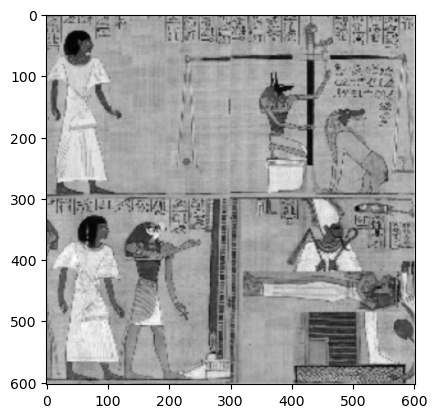

In [16]:
# gray_img = cv2.imread("images/images/aeroplane/2011_002114.jpg", cv2.IMREAD_GRAYSCALE)
gray_img = cv2.imread("../data/test_img.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(gray_img, cmap="gray")

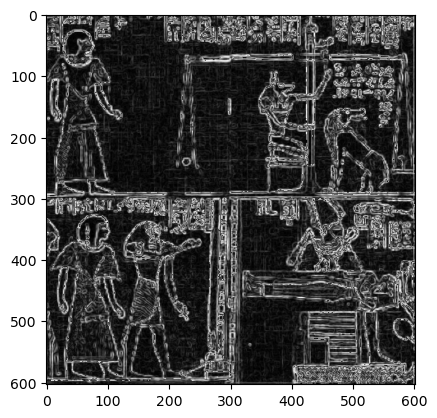

In [26]:
def sobel_edge_detection(image: np.ndarray, kernel_size: int=3) -> np.ndarray:
	"""
	Apply Sobel operator to detect edges in an image.

	Parameters:
	image (array_like): The input image for edge detection.
	kernel_size (int): The size of the Sobel kernel. Must be a multiple of 3.

	Returns:
	array_like: The gradient magnitude image representing edges.
	"""
	if kernel_size % 3 != 0:
		raise ValueError("Kernel size must be a multiple of 3.")
	
	image = image.astype(np.float32)

	kernel_v = np.array([[-1, 0, 1],
					  	[-2, 0, 2],
						[-1, 0, 1]])
	kernel_h = np.array([[-1, -2, -1],
					  	[0, 0, 0],
						[1, 2, 1]])
	
	# grow kernels to the desired size
	kernel_v = np.repeat(kernel_v, kernel_size//3, axis=0)
	kernel_v = np.repeat(kernel_v, kernel_size//3, axis=1)
	kernel_h = np.repeat(kernel_h, kernel_size//3, axis=0)
	kernel_h = np.repeat(kernel_h, kernel_size//3, axis=1)
	
	# Apply kernels to the input image
	grad_x = cv2.filter2D(image, -1, kernel_v)
	grad_y = cv2.filter2D(image, -1, kernel_h)

	# Compute gradient magnitude
	grad_mag = np.sqrt(grad_x**2 + grad_y**2)

	return grad_mag.astype(np.uint8)
	

def canny_edge_detector(image, low_threshold, high_threshold):
	"""
	Apply Canny edge detector to an image.

	Parameters:
	image (array_like): The input image for edge detection.
	low_threshold (int): The lower bound for hysteresis thresholding.
	high_threshold (int): The upper bound for hysteresis thresholding.

	Returns:
	array_like: The binary image representing detected edges.
	"""
	pass


def laplacian_of_gaussian(image, sigma):
	"""
	Apply the Laplacian of Gaussian edge detector to the image.

	Parameters:
	image (array_like): The grayscale image.
	sigma (float): The standard deviation of the Gaussian kernel.

	Returns:
	array_like: The image with the Laplacian of Gaussian edge detection applied.
	"""
	pass


sobel_img = sobel_edge_detection(gray_img, 3)
plt.imshow(sobel_img, cmap='gray')

## Watersheds

**Objective:**
Implement the watershed algorithm for image segmentation.

**Guideline:**
1. Load a Color Image
2. Preprocessing for Marker Computation. Grayscale it, and find `sure`regions for foreground and background areas.
3. Compute Markers: Label the regions (foreground, background, and unknown) to create markers.
4. Apply Watershed Algorithm. use `cv2.watershed` from OpenCV to perform the segmentation. (Optional: implement your own version of watershed by hand)
5. Visualize the Results and display the segmented image, highlighting the boundaries obtained from the watershed algorithm.

### Expected Results:
- Visual representation of image segmentation using the watershed algorithm. Compare the results qualitatively with the original image.


In [8]:
def load_color_image(file_path: str) -> np.ndarray:
    """
    Load a color image from the specified file path.

    Parameters:
    file_path (str): The path to the image file.

    Returns:
    np.ndarray: The color image.
    """


def preprocess_for_markers(image: np.ndarray) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    Preprocess the image to find sure foreground and background areas.

    Parameters:
    image (np.ndarray): The color image.

    Returns:
    Tuple[np.ndarray, np.ndarray, np.ndarray]: A tuple containing the grayscale image, sure foreground, and sure background.
    """

def compute_markers(foreground: np.ndarray, background: np.ndarray) -> np.ndarray:
    """
    Compute markers for the watershed algorithm based on the foreground and background.

    Parameters:
    foreground (np.ndarray): The sure foreground area.
    background (np.ndarray): The sure background area.

    Returns:
    np.ndarray: The markers for the watershed algorithm.
    """


def apply_watershed(image: np.ndarray, markers: np.ndarray, manual: bool = False) -> np.ndarray:
    """
    Apply the watershed algorithm to segment the image.

    Parameters:
    image (np.ndarray): The original color image.
    markers (np.ndarray): The computed markers.
    manual (bool, optional): Flag to perform the watershed algorithm manually. Default is False.

    Returns:
    np.ndarray: The segmented image.
    """


def visualize_segmentation(original_image: np.ndarray, segmented_image: np.ndarray):
    """
    Visualize the original and segmented images.

    Parameters:
    original_image (np.ndarray): The original color image.
    segmented_image (np.ndarray): The segmented image from the watershed algorithm.
    """


def watershed_segmentation(image):
    """
    Apply watershed algorithm to segment an image.

    Parameters:
    image (array_like): The input image for segmentation.

    Returns:
    array_like: The segmented image where each region is labeled with a unique integer.
    """
    pass


## Region-Based Segmentation Exercise
**Objective:**  
Explore and implement one region-based segmentation technique. The options are Region Growing, Split-and-Merge, and Flood Fill. These techniques focus on creating image segments based on the similarity and proximity of pixels.

**Guideline:**
1. Choose one of the region-based segmentation methods:
   - **Split-and-Merge (using RAG):** Recursively divides an image into homogeneous regions, then merges adjacent regions with similar characteristics. Represent the image as a Region Adjacency Graph (RAG) using the scikit-image library.
   - **Flood Fill:** Begins from a seed point and expands the region by adding neighboring pixels that match the seed’s properties.

2. Implement the chosen method manually or using appropriate libraries (you can rely on `scikit-image` libraries)
3. Apply the algorithm to a sample image and analyze the results.
4. Perform an analisys of the hyperparameters of the method

**Expected Results:**  
- A segmented image using the selected region-based segmentation method.
- Comparative analysis of the segmented results against the original image to evaluate the effectiveness of the chosen method.


### 4. Cluster-based Segmentation Exercise

**Objective:**  
Analysis between K-means clustering and Gaussian Mixture Models (GMM).
You can use the code or modify at your own.

**Guideline:**
1. Load a color image.
2. Perform an analisys of the hyperparameters of the method
3. Analyze the results and compare the effectiveness of the methods on image segmentation.
4. (Optional) Add extra functionalities to any algorithm

**Expected Results:**  
- Images segmented into distinct regions based on the clustering algorithm.
- In-depth analysis of the segmentation performance, discussing the suitability of the chosen method for the image characteristics.

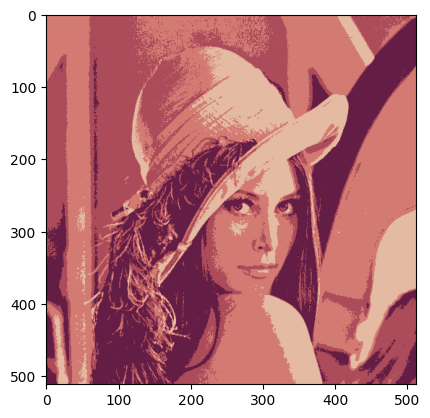

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from skimage.color import rgb2lab, rgb2hsv, hsv2rgb, lab2rgb
from skimage import io

def segment_image(image, color_space='RGB', auto_select_clusters=False, max_clusters=10, init='k-means++', n_init=10, max_iter=300, tol=1e-4, random_state=None):
    """
    Segments the given image using K-means clustering with options for automatic cluster selection and different color spaces.
    """

    # Convert image to the specified color space
    if color_space == 'HSV':
        converted_image = rgb2hsv(image)
    elif color_space == 'Lab':
        converted_image = rgb2lab(image)
    else:
        converted_image = image.copy()  # Copy to avoid modifying the original image

    # Preprocess the image
    image_reshaped = converted_image.reshape((-1, 3))

    # Automatic cluster selection
    if auto_select_clusters:
        best_score = -1
        best_k = 2
        for k in range(2, max_clusters + 1):
            kmeans = KMeans(n_clusters=k, init=init, n_init=n_init, max_iter=max_iter, tol=tol, random_state=random_state)
            labels = kmeans.fit_predict(image_reshaped)
            score = calinski_harabasz_score(image_reshaped, labels)
            if score > best_score:
                best_score = score
                best_k = k
        n_clusters = best_k
    else:
        n_clusters = max_clusters

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, max_iter=max_iter, tol=tol, random_state=random_state)
    kmeans.fit(image_reshaped)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]

    # Reshape the segmented image
    segmented_img = segmented_img.reshape(converted_image.shape)

    # Convert segmented image back to RGB if necessary
    if color_space == 'HSV':
        segmented_img = hsv2rgb(segmented_img)
    elif color_space == 'Lab':
        segmented_img = lab2rgb(segmented_img)
    elif color_space == 'RGB':
        segmented_img = segmented_img.astype(np.uint8)


    return segmented_img

import imutils
lenna = imutils.url_to_image('https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg')

plt.imshow(segment_image(lenna[:, :, ::-1],color_space='RGB', max_clusters=20, auto_select_clusters=True))
plt.show()

1: -371832.957040002
2: -1763034.062012922
3: -1870005.2768504065
4: -2068155.696958282
5: -2139693.130150749
6: -2181780.3165282765
7: -2195145.9715831694
8: -2226271.3268730575
9: -2228353.8737865253
10: -2252121.891937313


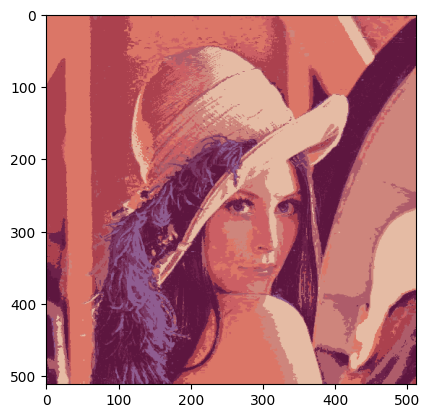

In [31]:
import numpy as np
from sklearn.mixture import GaussianMixture
from skimage import io, color


def segment_image(image, color_space='hsv', max_components=10, covariance_type='tied'):
    """
    Segments an image using Gaussian Mixture Models.

    Parameters:
    - resize_factor: int, factor by which the image is resized to reduce computation.
    - color_space: str, color space to convert the image ('rgb', 'hsv', 'lab', etc.).
    - n_components: int, number of components for GMM.
    - covariance_type: str, type of covariance parameters to use.
    - normalization: bool, whether to normalize the image data.

    Returns:
    - segmented_image: np.ndarray, the segmented image.
    """

    # Resize for faster processing
    # Convert to desired color space
    if color_space == 'hsv':
        image_converted = color.rgb2hsv(image)
    elif color_space == 'lab':
        image_converted = color.rgb2lab(image)
    else:
        image_converted = image

    # Reshape the image to be a two-dimensional array
    image_array = image_converted.reshape(-1, 3)

    best_aic = np.inf
    best_n_components = 1

    for n in range(1, max_components + 1):
        gmm = GaussianMixture(n_components=n, covariance_type=covariance_type, random_state=0)
        gmm.fit(image_array)
        current_aic = gmm.aic(image_array)
        print(f"{n}: {current_aic}")
        if current_aic < best_aic:
            best_aic = current_aic
            best_n_components = n

    # Initialize and fit the GMM
    gmm = GaussianMixture(n_components=best_n_components, covariance_type=covariance_type, random_state=0)
    gmm.fit(image_array)

    # Predict the cluster assignment for each pixel
    segmentation = gmm.predict(image_array)

    # Replace each pixel with the mean color of its segment
    means = gmm.means_
    segmented_image = np.array([means[label] for label in segmentation])

    # Reshape back to the original image shape
    segmented_image = segmented_image.reshape(image.shape[0], image.shape[1], 3)

    # Convert back to RGB if necessary
    if color_space == 'hsv':
        segmented_image = color.hsv2rgb(segmented_image)
    elif color_space == 'lab':
        segmented_image = color.lab2rgb(segmented_image)
    
    return segmented_image

plt.imshow(segment_image(lenna[:, :, ::-1], color_space='hsv', max_components=10, covariance_type='full'))
plt.show()